### Importing Libraries

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [91]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

### Importing Datasets

In [93]:
country_geo = r'C:\Users\aminj\Documents\DataSets\World University Rankings\world-countries.json'

In [94]:
path = r'C:\Users\aminj\Documents\DataSets\World University Rankings'

In [95]:
df = pd.read_csv(os.path.join(path, 'data', 'cwurData.csv'))

In [96]:
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [97]:
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [98]:
type(df)

pandas.core.frame.DataFrame

### Extreme Value Check

<Axes: xlabel='world_rank', ylabel='Count'>

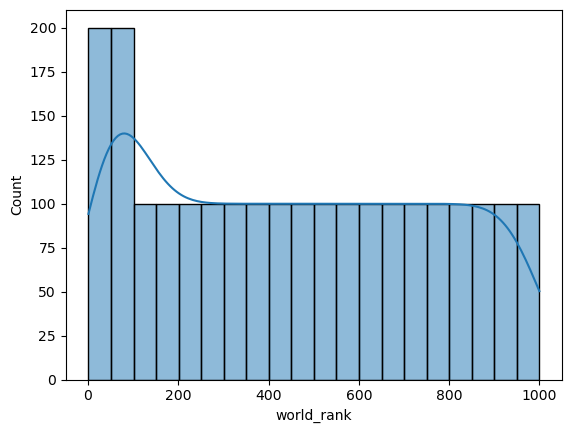

In [100]:
sns.histplot(df['world_rank'], bins=20, kde = True)

In [101]:
df = df[df['world_rank'] < 500] ##clearing extreme values

<Axes: xlabel='world_rank', ylabel='Count'>

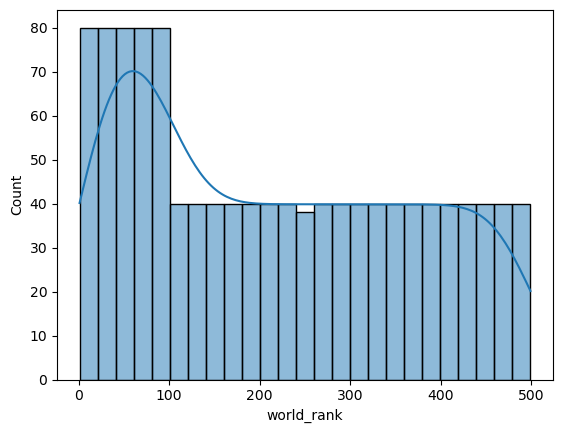

In [102]:
sns.histplot(df['world_rank'], bins=25, kde = True)

<Axes: xlabel='alumni_employment', ylabel='Count'>

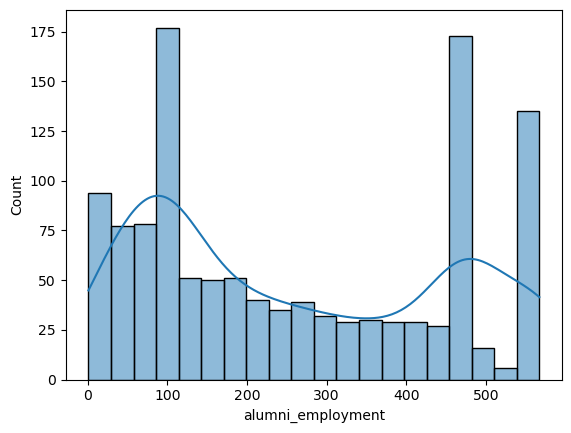

In [103]:
sns.histplot(df['alumni_employment'], bins=20, kde = True)

<Axes: xlabel='national_rank', ylabel='Count'>

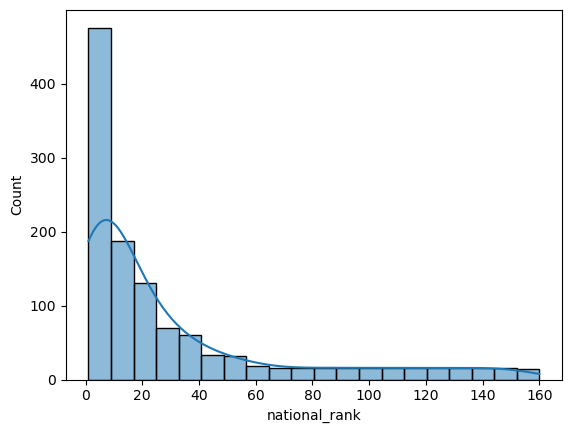

In [104]:
sns.histplot(df['national_rank'], bins=20, kde = True)

<Axes: xlabel='score', ylabel='Count'>

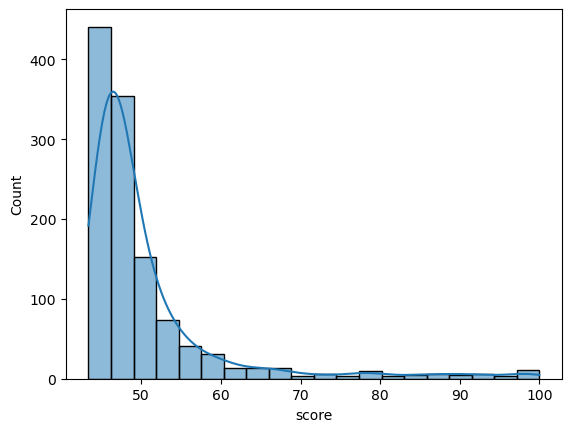

In [105]:
sns.histplot(df['score'], bins=20, kde = True)

<Axes: xlabel='quality_of_faculty', ylabel='Count'>

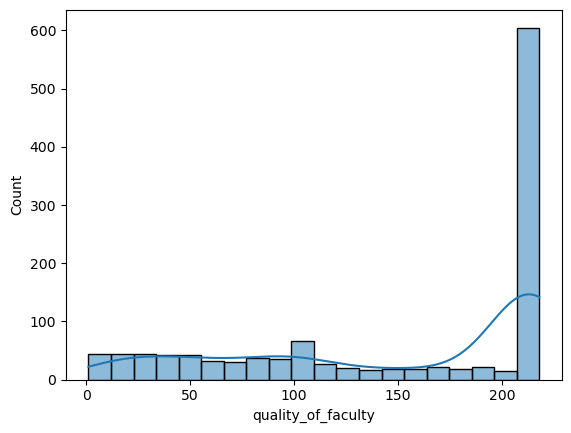

In [106]:
sns.histplot(df['quality_of_faculty'], bins=20, kde = True)

In [107]:
df = df[df['quality_of_faculty'] < 100] ##clearing extreme values

<Axes: xlabel='quality_of_faculty', ylabel='Count'>

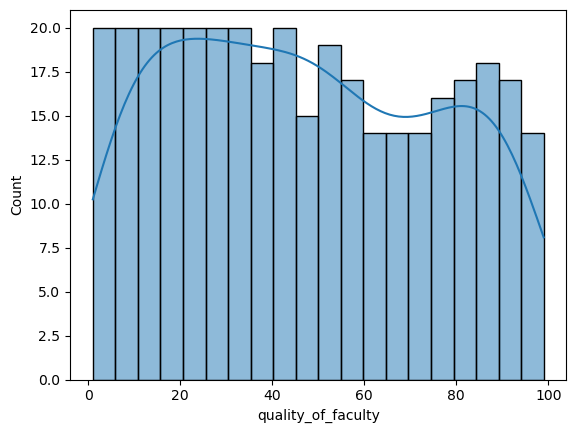

In [108]:
sns.histplot(df['quality_of_faculty'], bins=20, kde = True)

In [109]:
data_to_plot = df[['world_rank','country']]
data_to_plot.head()

,world_rank,country
0,1,USA
1,2,USA
2,3,USA
3,4,United Kingdom
4,5,USA


In [110]:
df.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            155
patents                   0
score                     0
year                      0
dtype: int64

In [111]:
df=df.drop(columns = ['broad_impact'])

In [112]:
df.isnull().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
patents                 0
score                   0
year                    0
dtype: int64

In [114]:
map = folium.Map(location = [100, 0], zoom_start = 2.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['world_rank', 'country'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Rank").add_to(map)
folium.LayerControl().add_to(map)

map

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''